DATA PREPROCESSING


In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump



In [2]:
from google.colab import drive
drive.mount('/content/drive')

# %% --------------------------------------- Load Data  -----------------------------------------------------------------
dataset = pd.read_csv('/content/drive/MyDrive/FINAL_PROJECT/PROJECT/AMAZON/Finaldata_with_Fourier.csv', parse_dates=['Date'])
all_tweets = pd.read_csv("/content/drive/MyDrive/FINAL_PROJECT/DATASET/TWEETS.csv", parse_dates=["Date"])



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
all_tweets.head()

,Date,Stock Name,score
0,2021-09-30,AAPL,0.09890
1,2021-09-30,AMD,0.41780
2,2021-09-30,AMZN,0.24648
3,2021-09-30,DIS,0.54610
4,2021-09-30,GOOG,0.44040


In [4]:
stock_name = 'AMZN'
tweets = all_tweets[all_tweets['Stock Name'] == stock_name]
print(tweets.shape)
tweets.head()


(365, 3)


,Date,Stock Name,score
2,2021-09-30,AMZN,0.246480
15,2021-10-01,AMZN,0.359337
30,2021-10-02,AMZN,-0.000700
43,2021-10-03,AMZN,0.834400
56,2021-10-04,AMZN,0.258650


In [5]:
tweets = tweets.drop(columns=['Stock Name'])
tweets.head()

,Date,score
2,2021-09-30,0.246480
15,2021-10-01,0.359337
30,2021-10-02,-0.000700
43,2021-10-03,0.834400
56,2021-10-04,0.258650


In [6]:
dataset.head()
dataset = dataset.drop(columns=['Stock Name'])

In [7]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA7,MA21,MACD,...,upper_band,lower_band,EMA,logmomentum,absolute of 3 comp,angle of 3 comp,absolute of 6 comp,angle of 6 comp,absolute of 9 comp,angle of 9 comp
0,2021-10-28,170.104996,173.949997,169.300003,172.328506,172.328506,114174000,169.436571,166.502239,-0.644339,...,174.724811,158.279667,171.261756,5.143583,152.722266,0.029308,146.289127,0.006853,144.961891,-0.003597
1,2021-10-29,165.001007,168.740997,163.666000,168.621506,168.621506,129722000,169.132071,166.710310,-0.040452,...,174.894671,158.525950,169.501589,5.121708,153.799723,0.031264,149.178116,0.004559,148.936035,-0.003740
2,2021-11-01,168.089996,168.792999,164.600998,165.905502,165.905502,72178000,168.297071,166.793287,-0.243565,...,174.234002,159.352572,167.104198,5.105373,154.877430,0.032989,152.084747,0.002233,152.970132,-0.003658
3,2021-11-02,165.750504,166.556000,164.177505,165.637497,165.637497,52552000,168.134214,167.086073,-0.088001,...,173.997963,160.174182,166.126397,5.103746,155.951989,0.034474,154.978207,-0.000063,156.992766,-0.003371
4,2021-11-03,165.449997,169.746002,164.876007,169.199997,169.199997,67944000,168.588715,167.474168,0.389213,...,174.122785,160.825550,168.175464,5.125154,157.019937,0.035715,157.828480,-0.002274,160.932123,-0.002904


<ipython-input-8-bdb8fbababdc>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill(), dataset.iloc[:, 1:].bfill()]).groupby(level=0).mean()


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA7',
       'MA21', 'MACD', '20SD', 'upper_band', 'lower_band', 'EMA',
       'logmomentum', 'absolute of 3 comp', 'angle of 3 comp',
       'absolute of 6 comp', 'angle of 6 comp', 'absolute of 9 comp',
       'angle of 9 comp', 'Tweets'],
      dtype='object')


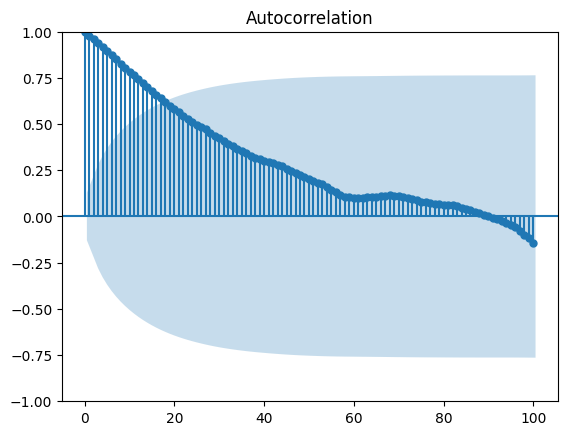

In [8]:

# %% --------------------------------------- Data Preprocessing  -----------------------------------------------------------------

# Replace 0 by NA
dataset.replace(0, np.nan, inplace=True)
dataset.to_csv("/content/drive/MyDrive/FINAL_PROJECT/PROJECT/AMAZON/dataset.csv", index=False)
# Add News data
dataset["Tweets"] = tweets["score"]

# Check NA and fill them
dataset.isnull().sum()
dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill(), dataset.iloc[:, 1:].bfill()]).groupby(level=0).mean()
print(dataset.columns)

# Set the date to datetime data
datetime_series = pd.to_datetime(dataset['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='Date')
dataset = dataset.drop(columns='Date')

# Get features and target
X_value = pd.DataFrame(dataset.iloc[:, :])
y_value = pd.DataFrame(dataset.iloc[:, 3])

# Autocorrelation Check
sm.graphics.tsa.plot_acf(y_value.squeeze(), lags=100)
plt.show()



In [9]:

# Normalized the data
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaler.fit(X_value)
y_scaler.fit(y_value)

X_scale_dataset = X_scaler.fit_transform(X_value)
y_scale_dataset = y_scaler.fit_transform(y_value)

dump(X_scaler, open('/content/drive/MyDrive/FINAL_PROJECT/PROJECT/AMAZON/X_scaler.pkl', 'wb'))
dump(y_scaler, open('/content/drive/MyDrive/FINAL_PROJECT/PROJECT/AMAZON/y_scaler.pkl', 'wb'))

# Reshape the data
'''Set the data input steps and output steps,
    we use 30 days data to predict 1 day price here,
    reshape it to (None, input_step, number of features) used for LSTM input'''
n_steps_in = 3
n_features = X_value.shape[1]
n_steps_out = 1

# Get X/y dataset
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 3 and len(y_value) == 1:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)



In [10]:


# get the train test predict index
def predict_index(dataset, X_train, n_steps_in, n_steps_out):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index



In [11]:

# Split train/test dataset
def split_train_test(data):
    train_size = round(len(X) * 0.7)
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

# Get data and check shape
X, y, yc = get_X_y(X_scale_dataset, y_scale_dataset)
X_train, X_test, = split_train_test(X)
y_train, y_test, = split_train_test(y)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(dataset, X_train, n_steps_in, n_steps_out)
# %% --------------------------------------- Save dataset -----------------------------------------------------------------
print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('y_c_train shape: ', yc_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('y_c_test shape: ', yc_test.shape)
print('index_train shape:', index_train.shape)
print('index_test shape:', index_test.shape)



X shape:  (229, 3, 21)
y shape:  (229, 1)
X_train shape:  (160, 3, 21)
y_train shape:  (160, 1)
y_c_train shape:  (160, 3, 1)
X_test shape:  (69, 3, 21)
y_test shape:  (69, 1)
y_c_test shape:  (69, 3, 1)
index_train shape: (160,)
index_test shape: (69,)


In [12]:
np.save("/content/drive/MyDrive/FINAL_PROJECT/PROJECT/AMAZON/y_train.npy", y_train)
np.save("/content/drive/MyDrive/FINAL_PROJECT/PROJECT/AMAZON/X_train.npy", X_train)
np.save("/content/drive/MyDrive/FINAL_PROJECT/PROJECT/AMAZON/y_test.npy", y_test)
np.save("/content/drive/MyDrive/FINAL_PROJECT/PROJECT/AMAZON/X_test.npy", X_test)
np.save("/content/drive/MyDrive/FINAL_PROJECT/PROJECT/AMAZON/yc_train.npy", yc_train)
np.save("/content/drive/MyDrive/FINAL_PROJECT/PROJECT/AMAZON/yc_test.npy", yc_test)
np.save('/content/drive/MyDrive/FINAL_PROJECT/PROJECT/AMAZON/index_train.npy', index_train)
np.save('/content/drive/MyDrive/FINAL_PROJECT/PROJECT/AMAZON/index_test.npy', index_test)
